In [2]:
%matplotlib inline


import scipy.io as sio
import numpy as np
from nilearn import plotting 
import pandas as pd
import seaborn as sns

/home/finc/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
top_dir = '/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/'

In [4]:
mat = sio.loadmat('/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/multilayer_results_3/modules.mat')
allegiance = mat['modules']

In [5]:
allegiance.shape

(46, 4, 264, 20)

In [6]:
AM = np.zeros((46, 4, 264, 264))

In [7]:
for sub in range(len(allegiance[:,0,0,0])):
    for ses in range(len(allegiance[0,:,0,0])):
        for i in range(len(allegiance[0,0,:,0])):
            for j in range(len(allegiance[0,0,:,0])):
                vector = allegiance[sub, ses, i, :] == allegiance[sub, ses, j, :]
                M = vector.mean()
                AM[sub, ses, i, j] = M;

        

In [15]:
AMx = np.zeros((46, 4, 264, 264))

for i in range(46):
    for j in range(4):
        x = AM[i,j,:,:]
        np.fill_diagonal(x, 0)
        AMx[i,j,:,:] = x
        
AM = AMx


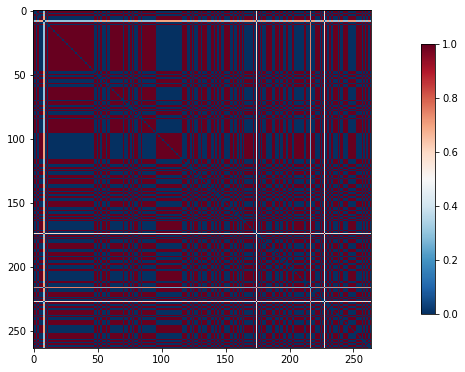

In [16]:
x = AM.mean(axis = 0)
#y = x.mean(axis = 0)
x.shape

plotting.plot_matrix(AM[0,0,:,:])

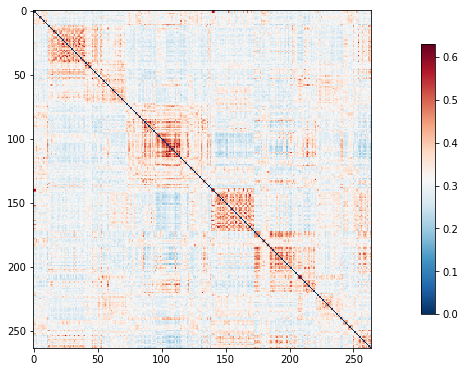

In [154]:
plotting.plot_matrix(x[0,:,:])

In [155]:
modules = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/code/modules.txt', sep = " ", header = None)
#modules = modules[0].values
network_pal = (sns.husl_palette(13))
network_lut = dict(zip(map(str, modules[0].unique()), network_pal))
network_lut

{'AU': [0.6280838378584804, 0.6317149736053096, 0.19371846323785552],
 'CER': [0.9538763597142671, 0.3594595647605631, 0.95756585161213],
 'CO': [0.756593795426372, 0.58660455674609, 0.19460548454202936],
 'DA': [0.9637107389395935, 0.4095260281088575, 0.7436447221919831],
 'DM': [0.44127702936426016, 0.6747986506725627, 0.19278677787286805],
 'FP': [0.2218708221705632, 0.6590814541823624, 0.7990680761766646],
 'MEM': [0.19925855442314272, 0.6935861010390585, 0.4349484671340832],
 'SAL': [0.38670894369284947, 0.6148978276981065, 0.9585912355668605],
 'SOM': [0.9218528551477546, 0.5003454332640002, 0.1960624705339954],
 'SUB': [0.7049741506310939, 0.5248938690186019, 0.9581527270311664],
 'UNC': [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 'VA': [0.20730980534421067, 0.6820252887361699, 0.5931178995944008],
 'VIS': [0.213603436221035, 0.6724447149771248, 0.6900417229996091]}

In [283]:
#networks = modules.columns.get_level_values(0)
#network_colors = pd.Series(modules, index=modules.columns).map(network_lut)

In [156]:
network_colors = pd.Series(modules[0]).map(network_lut)
network_colors = network_colors.tolist()
network_colors


[[0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9218528551477546, 0.5003454332640002, 0.1960624705339954],
 [0.9218528551477546, 0.5003454332640002, 0.1960624705339954],
 [0.9218528551477546, 0.5003454332640002, 0.1960624705339954],
 [0.9218528551477546, 0.5003454332640002, 0

In [157]:
# trying with sorting

modules = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/code/modules.txt', sep = " ", header = None)
#modules = modules[0].values
idx = np.argsort(modules[0])
modules= modules[0][idx]

network_pal = (sns.husl_palette(13))
network_lut = dict(zip(map(str, modules.unique()), network_pal))
network_lut

network_colors = pd.Series(modules).map(network_lut)
network_colors = network_colors.tolist()
network_colors


[[0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.9218528551477546, 0.5003454332640002, 0.1960624705339954],
 [0.9218528551477546, 0.5003454332640002, 0.1960624705339954],
 [0.9218528551477546, 0.5003454332640002, 

In [318]:
modules_new = modules[0][idx]

In [ ]:

coords = zip(indices[0], indices[1])


In [158]:
y = x[:,:,idx]
z = y[:,idx,:]

In [159]:

z.shape

(4, 264, 264)

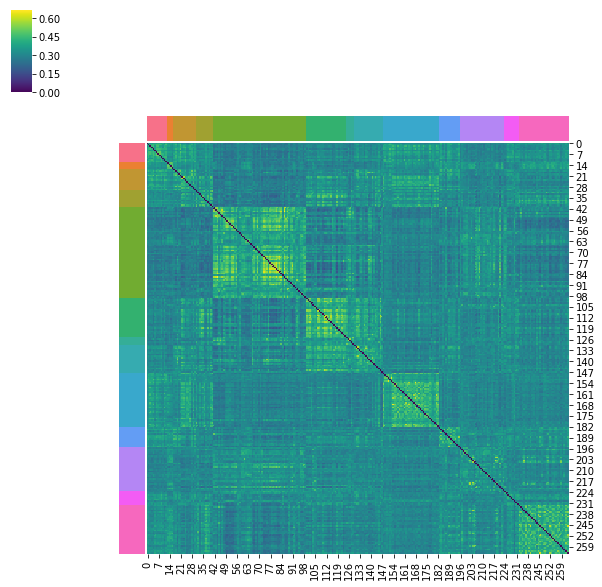

In [160]:
import seaborn as sns

sns.clustermap(z[3,:,:], cmap="viridis",row_cluster=False, col_cluster=False,
               row_colors=network_colors, col_colors=network_colors)

In [180]:
# Selecting subjects who finished the study

groups = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/group_assignment.csv')

trained = (groups.group == 'Experimental') | (groups.group == 'Control')
trained_subs = groups[trained]

experimental = (trained_subs == 'Experimental')
control = (trained_subs == 'Control')

exp_vector = experimental['group'].values
con_vector = control['group'].values

In [181]:
experimental = AM[exp_vector,:,:,:]

exp_sess = experimental.mean(axis = 0)

In [182]:
u = exp_sess[:,:,idx]
p = u[:,idx,:]

p.shape

(4, 264, 264)

In [183]:
control = AM[con_vector,:,:,:]
con_sess = control.mean(axis = 0)

r = con_sess[:,:,idx]
s = r[:,idx,:]

s.shape

(4, 264, 264)

In [38]:
experimental.shape

(23, 4, 264, 264)

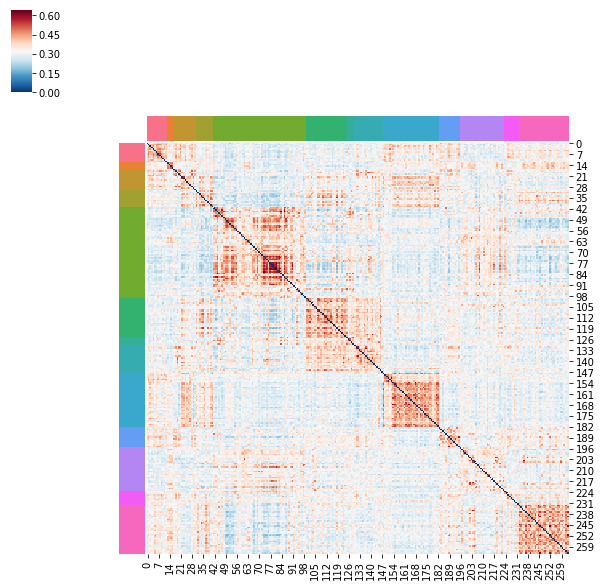

In [193]:
import seaborn as sns

sns.clustermap(s[3,:,:], cmap="RdBu_r",row_cluster=False, col_cluster=False,
               row_colors=network_colors, col_colors=network_colors)

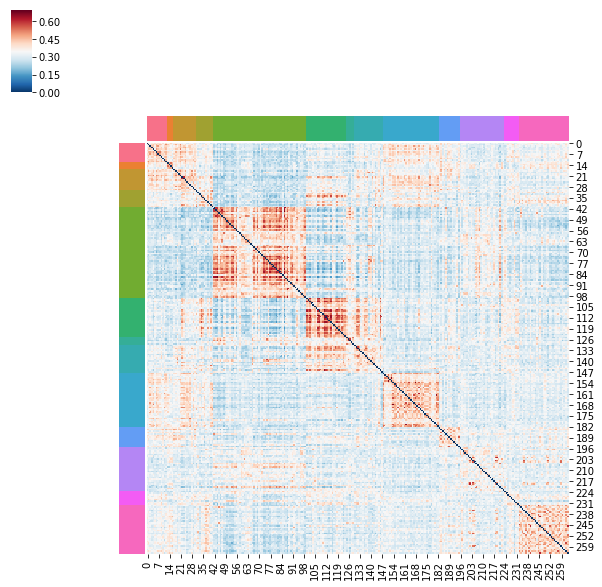

In [176]:
import seaborn as sns

sns.clustermap(p[3,:,:], cmap="RdBu_r",row_cluster=False, col_cluster=False,
               row_colors=network_colors, col_colors=network_colors)

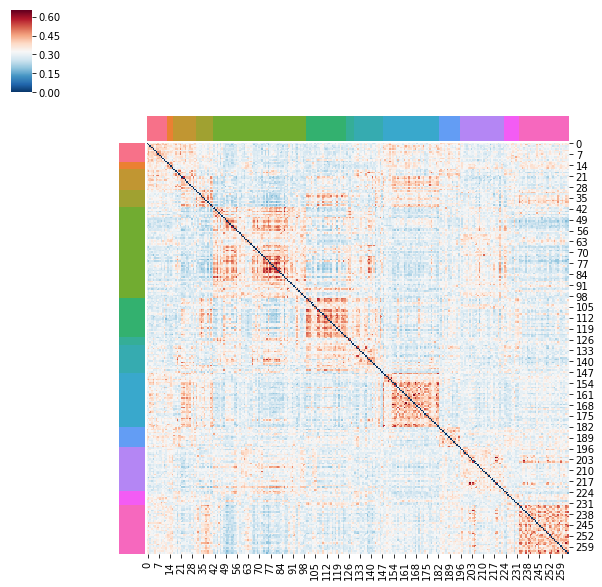

In [174]:
import seaborn as sns

sns.clustermap(p[0,:,:], cmap="RdBu_r",row_cluster=False, col_cluster=False,
               row_colors=network_colors, col_colors=network_colors)

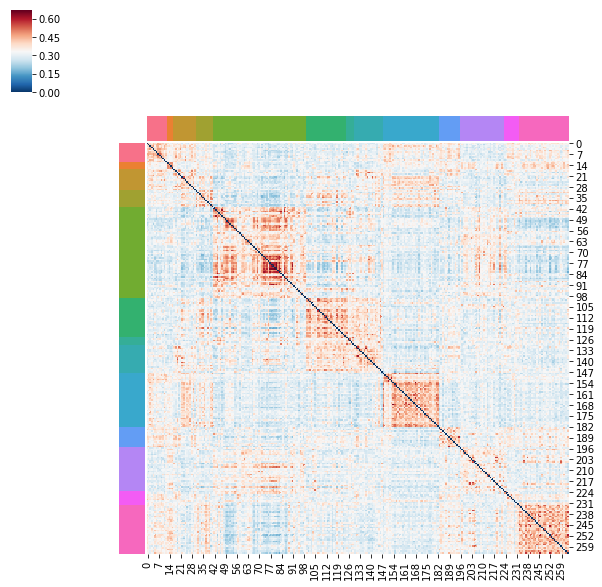

In [60]:
import seaborn as sns

sns.clustermap(s[3,:,:], cmap="RdBu_r",row_cluster=False, col_cluster=False,
               row_colors=network_colors, col_colors=network_colors)

In [194]:
mod = modules.reset_index(drop=True)

DMFP = (mod == 'DM')|(mod == 'FP')
DM = (mod == 'DM')
FP = (mod == 'FP')

sum(DMFP)

83

In [77]:
experimental = AM[con_vector,:,:,:]


In [70]:
experimental.shape

(23, 4, 264, 264)

In [78]:
u = experimental[:,:,:,idx]
e = u[:,:,idx,:]
e.shape

(23, 4, 264, 264)

In [79]:
dmfp = e[:,:,DMFP,:]
dmfp = dmfp[:,:,:,DMFP] 
dmfp.shape


mean_dmfp = dmfp.mean(axis = 0)
mean_dmfp.shape

(4, 83, 83)

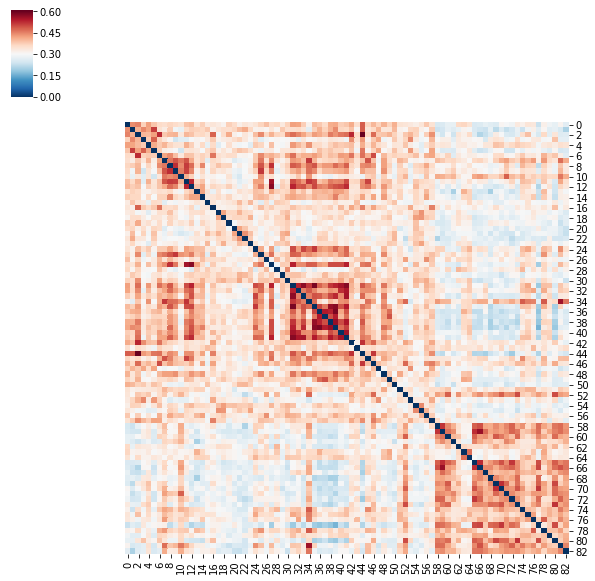

In [84]:
sns.clustermap(mean_dmfp[0,:,:], cmap="RdBu_r",row_cluster=False, col_cluster=False)

In [3]:
sns.clustermap(mean_dmfp[3,:,:], cmap="viridis",row_cluster=False, col_cluster=False)

NameError: name 'sns' is not defined

In [195]:
AMs = AM[:,:,idx,:]
AMsort = AMs[:,:,:,idx]

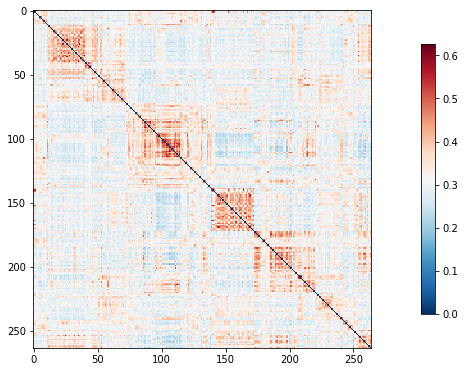

In [112]:
plotting.plot_matrix(c[0,:,:])

In [196]:
dm = AMsort[:,:,DM,:]
dm = dm[:,:,:,DM] 
dm.shape

mean_dm = dm.mean(axis = 2)
mean_dm = mean_dm.mean(axis = 2)

mean_dm.shape 
#mean_dm = dmp.mean(axis = 0)
#mean_dmfp.shape

mean_dm = pd.DataFrame(mean_dm)
mean_dm


,0,1,2,3
0,0.336861,0.388258,0.373395,0.371046
1,0.393966,0.373365,0.425119,0.324257
2,0.366795,0.450059,0.373424,0.377794
3,0.387753,0.365606,0.409037,0.347592
4,0.369917,0.407372,0.466231,0.421403
5,0.362693,0.416231,0.474257,0.463823
6,0.318163,0.321403,0.333799,0.348692
7,0.352111,0.433948,0.335048,0.351219
8,0.406510,0.376338,0.371076,0.504637
9,0.320927,0.333769,0.352229,0.373870


In [197]:
dm_i = AMsort[:,:,DM,:]
dm_i = dm_i[:,:,:,FP] 
dm_i.shape

mean_dm_i = dm_i.mean(axis = 2)
mean_dm_i = mean_dm_i.mean(axis = 2)

mean_dm_i.shape 
#mean_dm = dmp.mean(axis = 0)
#mean_dmfp.shape

mean_dm_i = pd.DataFrame(mean_dm_i)
mean_dm_i


,0,1,2,3
0,0.328552,0.315172,0.365310,0.332138
1,0.297552,0.277897,0.264483,0.268345
2,0.269345,0.291345,0.313759,0.304897
3,0.285897,0.332586,0.296793,0.291586
4,0.320034,0.309379,0.309655,0.310172
5,0.311448,0.297069,0.330724,0.278069
6,0.295828,0.305483,0.318552,0.339103
7,0.303345,0.266448,0.312172,0.306172
8,0.287414,0.278517,0.282310,0.252690
9,0.308828,0.317690,0.311310,0.310517


In [118]:
dm_i.shape

(23, 4, 58, 25)

In [91]:
AM.shape

(46, 4, 264, 264)

In [198]:
groups = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/group_assignment.csv')

trained = (groups.group == 'Experimental') | (groups.group == 'Control')
trained_subs = groups[trained]
trained_subs = trained_subs.reset_index(drop=True)

trained_subs


dmn_recruit = pd.concat([trained_subs, mean_dm], axis = 1)
dmn_integr = pd.concat([trained_subs, mean_dm_i], axis = 1)

In [199]:
dmn_recruit.to_csv(top_dir + 'dmn_recruit_o.csv', index=False)
dmn_integr.to_csv(top_dir + 'dmn_integr_o.csv', index=False)


In [123]:
dmn_integr

,sub,group,0,1,2,3
0,sub-01,Control,0.316103,0.332103,0.362828,0.304448
1,sub-02,Control,0.297862,0.303862,0.268586,0.288655
2,sub-04,Control,0.306931,0.288310,0.299103,0.311655
3,sub-05,Experimental,0.295552,0.334448,0.304724,0.274276
4,sub-06,Experimental,0.339483,0.343276,0.314207,0.302931
5,sub-07,Experimental,0.333103,0.302448,0.324759,0.295172
6,sub-08,Control,0.299138,0.317172,0.315517,0.309379
7,sub-10,Control,0.302483,0.284897,0.310690,0.324724
8,sub-11,Experimental,0.291241,0.274379,0.297207,0.259655
9,sub-12,Control,0.312138,0.349379,0.285828,0.307172


In [200]:
fp = AMsort[:,:,FP,:]
fp = fp[:,:,:,FP] 
fp.shape

mean_fp = fp.mean(axis = 2)
mean_fp = mean_fp.mean(axis = 2)

mean_fp.shape 
#mean_fp = fp.mean(axis = 0)
#mean_dmfp.shape

mean_fp = pd.DataFrame(mean_fp)
mean_fp

,0,1,2,3
0,0.39504,0.41536,0.39152,0.49664
1,0.38048,0.41552,0.39552,0.34928
2,0.35216,0.43280,0.36272,0.36832
3,0.37152,0.44608,0.36800,0.34720
4,0.36960,0.36784,0.45264,0.44560
5,0.43488,0.49856,0.44688,0.46240
6,0.32880,0.34176,0.35504,0.37952
7,0.38560,0.38560,0.33792,0.33392
8,0.40432,0.46432,0.39024,0.42816
9,0.38240,0.38432,0.35728,0.39968


In [201]:
fpn_recruit = pd.concat([trained_subs, mean_fp], axis = 1)
fpn_recruit.to_csv(top_dir + 'fpn_recruit_o.csv', index=False)
